Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

Read the female respondent file and display the variables names.

In [3]:
%matplotlib inline
# 
import chap01soln
resp = chap01soln.ReadFemResp()
resp.columns

Index(['caseid', 'rscrinf', 'rdormres', 'rostscrn', 'rscreenhisp',
       'rscreenrace', 'age_a', 'age_r', 'cmbirth', 'agescrn', 
       ...
       'pubassis_i', 'basewgt', 'adj_mod_basewgt', 'finalwgt', 'secu_r',
       'sest', 'cmintvw', 'cmlstyr', 'screentime', 'intvlngth'],
      dtype='object', length=3087)

Make a histogram of <tt>totincr</tt> the total income for the respondent's family.  To interpret the codes see the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=MALE&section=R&subSec=7958&srtLabel=609776).

In [4]:
import thinkstats2
hist = thinkstats2.Hist(resp.totincr)
incHist = hist

Display the histogram.

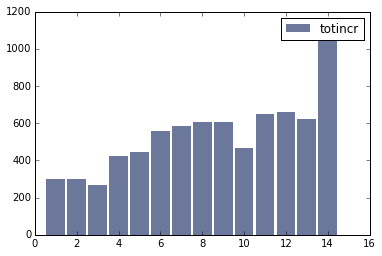

In [5]:
import thinkplot
thinkplot.Hist(hist, label='totincr')
thinkplot.Show()

Make a histogram of <tt>age_r</tt>, the respondent's age at the time of interview.

In [6]:
ageHist = thinkstats2.Hist(resp.age_r)

Make a histogram of <tt>numfmhh</tt>, the number of people in the respondent's household.

In [7]:
numHouseholdHist = thinkstats2.Hist(resp.numfmhh)

Make a histogram of <tt>parity</tt>, the number children the respondent has borne.  How would you describe this distribution?

In [8]:
ts2 = thinkstats2

parityHist = ts2.Hist(resp.parity)

Use Hist.Largest to find the largest values of <tt>parity</tt>.

In [9]:
parityHist.Largest()

[(22, 1),
 (16, 1),
 (10, 3),
 (9, 2),
 (8, 8),
 (7, 15),
 (6, 29),
 (5, 95),
 (4, 309),
 (3, 828)]

Use <tt>totincr</tt> to select the respondents with the highest income.  Compute the distribution of <tt>parity</tt> for just the high income respondents.

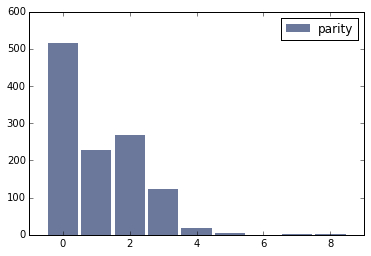

In [10]:
val, count = incHist.Largest()[0]

highIncomeResps = resp[resp.totincr == val]
parityHighIncomeHist = ts2.Hist(highIncomeResps.parity)
tp = thinkplot
tp.Hist(parityHighIncomeHist, label='parity')
tp.Show()

Find the largest parities for high income respondents.

In [11]:
parityHighIncomeHist.Largest()

[(8, 1), (7, 1), (5, 5), (4, 19), (3, 123), (2, 267), (1, 229), (0, 515)]

Compare the mean <tt>parity</tt> for high income respondents and others.

In [13]:
print(highIncomeResps.parity.mean())
print(resp.parity.mean())

1.0758620689655172
1.2232107811068953


Investigate any other variables that look interesting.

In [16]:
# Write a function called Mode that takes a hist,
# and returns the most frequent value

def Mode(hist):
    maxFreq = -1
    valWithMaxFreq = -1
    for val, freq in hist.Items():
        if freq > maxFreq:
            maxFreq = freq
            valWithMaxFreq = val
    return valWithMaxFreq

Mode(incHist)

        

14

In [18]:
# Write a function AllModes that takes a hist,
# returning a list of (value, freq) pairs in descending
# order of frequency

def AllModes(hist):
    return sorted(hist.Items(), key=lambda tup: tup[1], reverse=True)

AllModes(incHist)

[(14, 1160),
 (12, 658),
 (11, 647),
 (13, 623),
 (9, 607),
 (8, 606),
 (7, 583),
 (6, 559),
 (10, 468),
 (5, 445),
 (4, 421),
 (2, 301),
 (1, 299),
 (3, 266)]

In [31]:
import math

def CohenEffectSize(group1, group2):
    diff = group1.mean() - group2.mean()
    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / math.sqrt(pooled_var)
    return d

Using the variable totalwgt_lb, investigate whether first babies are lighter or heavier than others. Compute Cohen’s d to quantify the difference between the groups. How does it compare to the difference in pregnancy length


In [26]:
import nsfg
pregs = nsfg.ReadFemPreg()


/Users/xdyme/projects/checkouts/ThinkStats2/code/nsfg.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df.birthwgt_lb[df.birthwgt_lb > 20] = np.nan


In [33]:
firstBabies = pregs[pregs.birthord == 1]
otherBabies = pregs[pregs.birthord > 1]

(firstBabies.totalwgt_lb.mean(),
 otherBabies.totalwgt_lb.mean(),
 CohenEffectSize(firstBabies.totalwgt_lb, otherBabies.totalwgt_lb))


(7.201094430437772, 7.325855614973262, -0.088672927072602)